In [275]:
import sklearn.datasets
diabetes = sklearn.datasets.load_diabetes()

In [276]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd

In [277]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [278]:
x = diabetes.data
y = diabetes.target

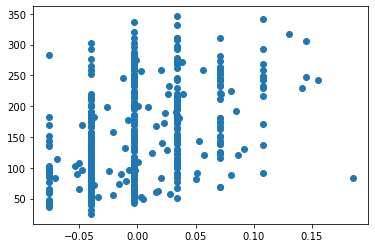

In [279]:
#find target data
x_axis = x[:,7]
y_axis = y
plt.scatter(x_axis, y_axis)

In [281]:
#set boolean
y = (diabetes.target > 150).astype(int)
y_axis = y

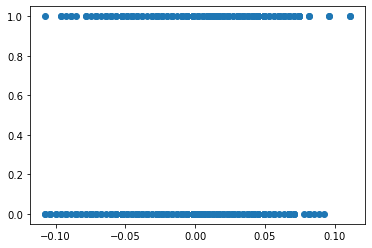

In [282]:
x_axis = x[:,0]
y_axis = y
plt.scatter(x_axis, y_axis)

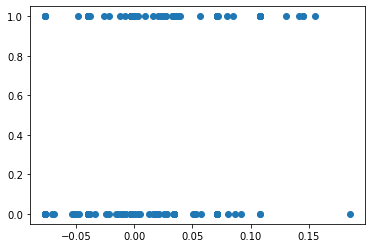

In [283]:
x_axis = x[:, 7]
y_axis = y
plt.scatter(x_axis, y_axis)

In [284]:
import sklearn.linear_model
model = sklearn.linear_model.LogisticRegression()

In [285]:
x_axis = x[:,7]
y_axis = y

In [287]:
#reshape and fit
x_axis = x_axis.reshape(-1,1)
model.fit(x_axis, y_axis)

LogisticRegression()

In [288]:
x_test = [[300]]
model.predict(x_test)

array([1])

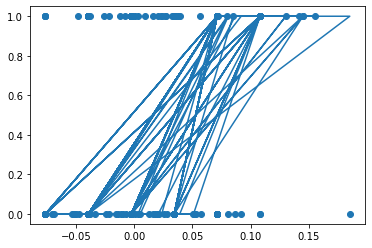

In [289]:
#plot using prediction 
plt.scatter(x_axis, y_axis)

x_new = x_axis.reshape(-1,1)
y_new = model.predict(x_new)

plt.plot(x_new, y_new)

plt.show()

So I just have a general question on this one. I'm not sure if my graph looks so crazy because of the model incorrectly classifying items, or if this is genuinely what it is supposed to look like...

In [198]:
#define boolean options
model.classes_

array([False,  True])

In [199]:
#parameters for model equation
print(model.coef_, model.intercept_)

[[3.02556221]] [-0.19056203]


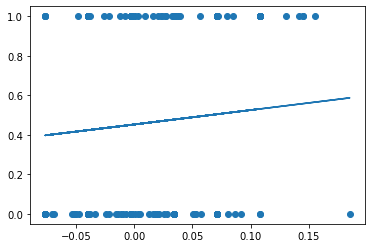

In [291]:
#predictions for model using equations

plt.scatter(x_axis,y_axis)

x_new = np.linspace(8000,58000,100000)
x_new = x_axis.reshape(-1,1)

y_model = 1 / (1 + np.exp(-(model.intercept_ + model.coef_ * x_new)))

plt.plot(x_new, y_model)

plt.show()

I also feel like the plot for this should not look the way that it does...

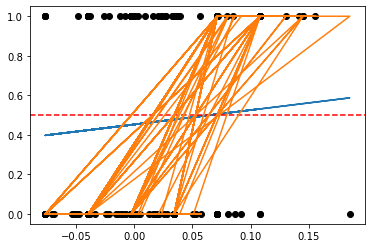

In [292]:
#find the predictions for this model

plt.plot(x_axis,y_axis,'ko')

x_new = np.linspace(8000,58000,100000)
x_new = x_axis.reshape(-1,1)

#use model equation 
y_model = 1 / (1 + np.exp(-(model.intercept_ + model.coef_ * x_new)))

plt.plot(x_new, y_model)

plt.axhline(0.5,color='r',linestyle='--')

x_new = np.linspace(8000,58000,100000)
x_new = x_axis.reshape(-1,1)
y_pred = model.predict(x_new)
plt.plot(x_new, y_pred)

plt.show()

In [202]:
#use to determine goodness of fit
model.score(x_axis, y_axis)

0.6018099547511312

In [293]:
# If the model correctly classifies i points and misclassifies j points out of k total
# the score should be i/k
242/442

0.5475113122171946

I do not believe that this model correctly classifies the points found within the dataset. This is shown by the confusion table below.

In [294]:
from sklearn.metrics import confusion_matrix

In [295]:
confusion_matrix(y_axis, model.predict(x_axis))

array([[225,  17],
       [159,  41]])

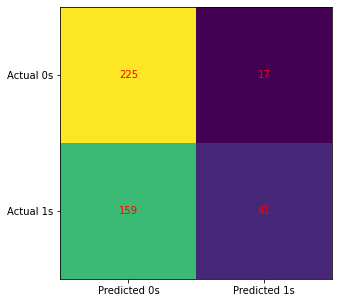

In [296]:
confmat = confusion_matrix(y_axis, model.predict(x_axis))

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(confmat)

# the below just sets the axis labels, tick marks, and text inside the boxes
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
for i in range(2):
    for j in range(2):
        ax.text(j, i, confmat[i,j], ha='center', va='center', color='red')

plt.show()

In [297]:
from sklearn.metrics import classification_report

In [298]:
print(classification_report(y_axis, model.predict(x_axis)))

              precision    recall  f1-score   support

           0       0.59      0.93      0.72       242
           1       0.71      0.20      0.32       200

    accuracy                           0.60       442
   macro avg       0.65      0.57      0.52       442
weighted avg       0.64      0.60      0.54       442



NEW FEATURE

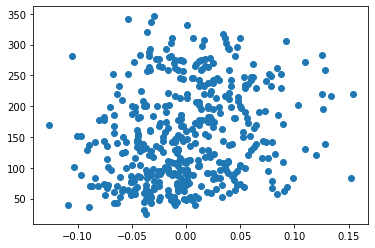

In [301]:
x = diabetes.data
y = diabetes.target
x_axis = x[:,4]
y_axis = y
plt.scatter(x_axis, y_axis)

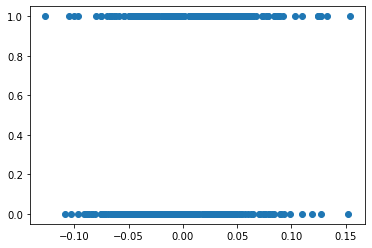

In [302]:
y = (diabetes.target > 150).astype(int)
y_axis = y
x_axis = x[:,4]
y_axis = y
plt.scatter(x_axis, y_axis)

In [305]:
x_axis = x_axis.reshape(-1,1)
model.fit(x_axis, y_axis)

LogisticRegression()

In [306]:
x_test = [[300]]
model.predict(x_test)

array([1])

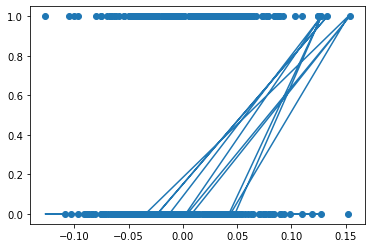

In [307]:
#plot using prediction 
plt.scatter(x_axis, y_axis)

x_new = x_axis.reshape(-1,1)
y_new = model.predict(x_new)

plt.plot(x_new, y_new)

plt.show()

In [308]:
model.classes_
print(model.coef_, model.intercept_)

[[1.50082879]] [-0.19084881]


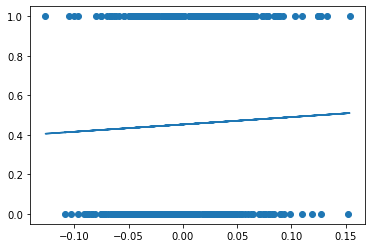

In [309]:
plt.scatter(x_axis,y_axis)

x_new = np.linspace(8000,58000,100000)
x_new = x_axis.reshape(-1,1)

y_model = 1 / (1 + np.exp(-(model.intercept_ + model.coef_ * x_new)))

plt.plot(x_new, y_model)

plt.show()

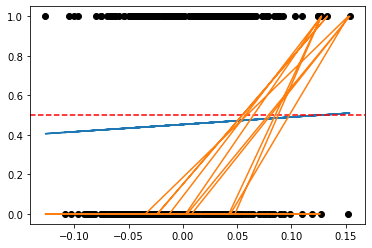

In [310]:
plt.plot(x_axis,y_axis,'ko')

x_new = np.linspace(8000,58000,100000)
x_new = x_axis.reshape(-1,1)

#use model equation 
y_model = 1 / (1 + np.exp(-(model.intercept_ + model.coef_ * x_new)))

plt.plot(x_new, y_model)

plt.axhline(0.5,color='r',linestyle='--')

x_new = np.linspace(8000,58000,100000)
x_new = x_axis.reshape(-1,1)
y_pred = model.predict(x_new)
plt.plot(x_new, y_pred)

plt.show()

In [311]:
model.score(x_axis, y_axis)

0.5497737556561086

In [317]:
# If the model correctly classifies i points and misclassifies j points out of k total
# the score should be i/k
243/442

0.5497737556561086

I believe this could be a better model than the previous one conducted

In [313]:
confusion_matrix(y_axis, model.predict(x_axis))

array([[240,   2],
       [197,   3]])

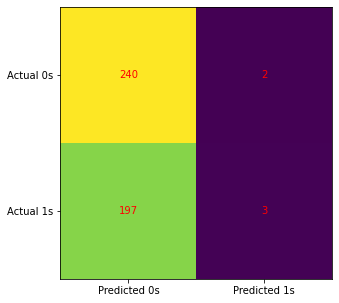

In [314]:
confmat = confusion_matrix(y_axis, model.predict(x_axis))

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(confmat)

# the below just sets the axis labels, tick marks, and text inside the boxes
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
for i in range(2):
    for j in range(2):
        ax.text(j, i, confmat[i,j], ha='center', va='center', color='red')

plt.show()